In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_data = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
drug_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean = drug_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_volume_mean_df = pd.DataFrame(tumor_volume_mean)

# Preview DataFrame
tumor_volume_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tvm_standard_error = drug_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tvm_standard_error_df = pd.DataFrame(tvm_standard_error)
# Preview DataFrame
tvm_standard_error_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean_df = tumor_volume_mean_df.reset_index()
tumor_volume_mean_pivot = tumor_volume_mean_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tvm_standard_error_df = tvm_standard_error_df.reset_index()
tvm_standard_error_pivot = tvm_standard_error_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tvm_standard_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


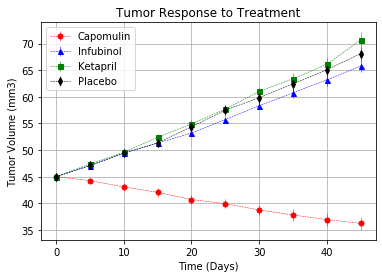

In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_volume_mean_pivot.index, tumor_volume_mean_pivot["Capomulin"], yerr=tvm_standard_error_pivot["Capomulin"], label="Capomulin", color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_volume_mean_pivot.index, tumor_volume_mean_pivot["Infubinol"], yerr=tvm_standard_error_pivot["Infubinol"], label="Infubinol", color="blue", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_volume_mean_pivot.index, tumor_volume_mean_pivot["Ketapril"], yerr=tvm_standard_error_pivot["Ketapril"], label="Ketapril", color="green", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_volume_mean_pivot.index, tumor_volume_mean_pivot["Placebo"], yerr=tvm_standard_error_pivot["Placebo"], label="Placebo", color="black", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()

# Save the Figure

plt.savefig("PymaceuticalsFigure1.png")

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean = drug_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
metsite_mean_df = pd.DataFrame(met_site_mean)
# Preview DataFrame
metsite_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsite_standard_error = drug_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
metsite_standard_error_df = pd.DataFrame(metsite_standard_error)
# Preview DataFrame
metsite_standard_error_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
metsite_mean_df = metsite_mean_df.reset_index()
metsite_mean_df_pivot = metsite_mean_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

metsite_standard_error_df = metsite_standard_error_df.reset_index()
metsite_standard_error_df_pivot = metsite_standard_error_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
metsite_standard_error_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


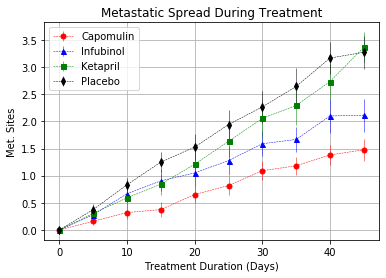

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(metsite_mean_df_pivot.index, metsite_mean_df_pivot["Capomulin"], yerr=metsite_standard_error_df_pivot["Capomulin"], label="Capomulin", color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metsite_mean_df_pivot.index, metsite_mean_df_pivot["Infubinol"], yerr=metsite_standard_error_df_pivot["Infubinol"], label="Infubinol", color="blue", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metsite_mean_df_pivot.index, metsite_mean_df_pivot["Ketapril"], yerr=metsite_standard_error_df_pivot["Ketapril"], label="Ketapril", color="green", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metsite_mean_df_pivot.index, metsite_mean_df_pivot["Placebo"], yerr=metsite_standard_error_df_pivot["Placebo"], label="Placebo", color="black", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()
plt.legend()
# Save the Figure
plt.savefig("PymaceuticalsFigure2.png")


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = drug_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mice Count": mice_count})
# Preview DataFrame
mice_count_df.head()

Mice Count
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.reset_index()
mice_count_df_pivot = mice_count_df.pivot(index="Timepoint", columns="Drug")["Mice Count"]

# Preview the Data Frame
mice_count_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


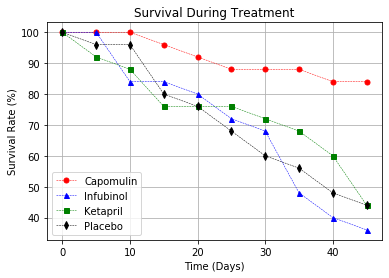

In [12]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mice_count_df_pivot["Capomulin"] / 25, label="Capomulin", color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(100 * mice_count_df_pivot["Infubinol"] / 25, label="Infubinol", color="blue", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(100 * mice_count_df_pivot["Ketapril"] / 25, label="Ketapril", color="green", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(100 * mice_count_df_pivot["Placebo"] / 25, label="Placebo", color="black", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.grid()
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("PymaceuticalsFigure3.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
drug_pct_change = 100 * (tumor_volume_mean_pivot.iloc[-1] - tumor_volume_mean_pivot.iloc[0]) / tumor_volume_mean_pivot.iloc[0]
drug_pct_change_se = 100 * (tvm_standard_error_pivot.iloc[-1] - tvm_standard_error_pivot.iloc[0] / tvm_standard_error_pivot.iloc[0])

# Display the data to confirm
drug_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

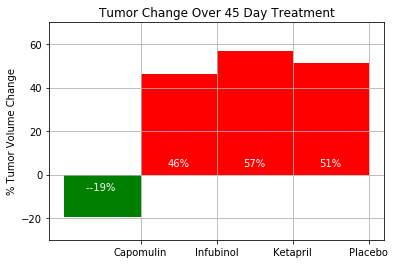

In [14]:
# Store all Relevant Percent Changes into a Tuple
pct_change = (drug_pct_change["Capomulin"],
             drug_pct_change["Infubinol"],
             drug_pct_change["Ketapril"],
             drug_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
index = np.arange(len(pct_change))
width = 1

drug_pass = ax.bar(index[0], pct_change[0], width, color="green")
drug_fail = ax.bar(index[1:], pct_change[1:], width, color="red")


# Orient widths. Add labels, tick marks, etc. 
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_ylabel("% Tumor Volume Change")
ax.set_xticks(index + 0.5)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def percentfail(fail):
    for fail in fail:
        height = fail.get_height()
        ax.text(fail.get_x() + fail.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")
def percentpass(passed):
    for passed in passed:
        height = passed.get_height()
        ax.text(passed.get_x() + passed.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
percentfail(drug_fail)
percentpass(drug_pass)
# Save the Figure
fig.savefig("PymaceuticalsFigure4.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)